In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# BasicODESolver

### Imports

In [10]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

### Model Instantiation

Model must include rates, species, and reactions

In [11]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A,B,C,D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [12]:
model = MichaelisMenten()


### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [40]:
%time results = model.run(solver=BasicODESolver(), show_labels=True,number_of_trajectories=5)

2019-07-17 13:32:59,892 - root - WARNING - Generating duplicate trajectories for model with ODE Solver. Consider running with only 1 trajectory.


CPU times: user 27.4 ms, sys: 3.64 ms, total: 31 ms
Wall time: 29.8 ms


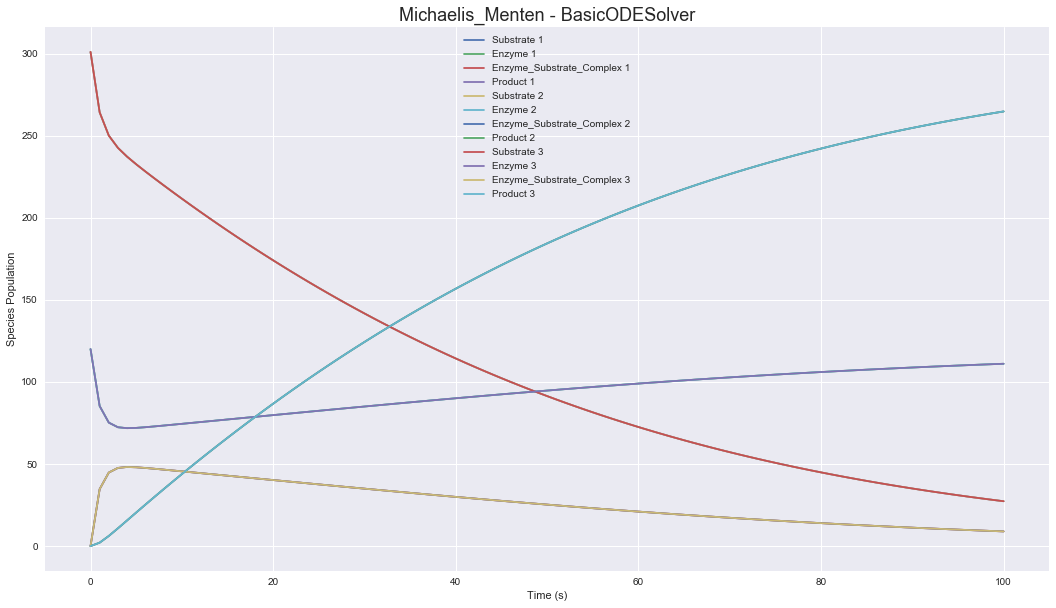

In [39]:
results.plot(style="seaborn")

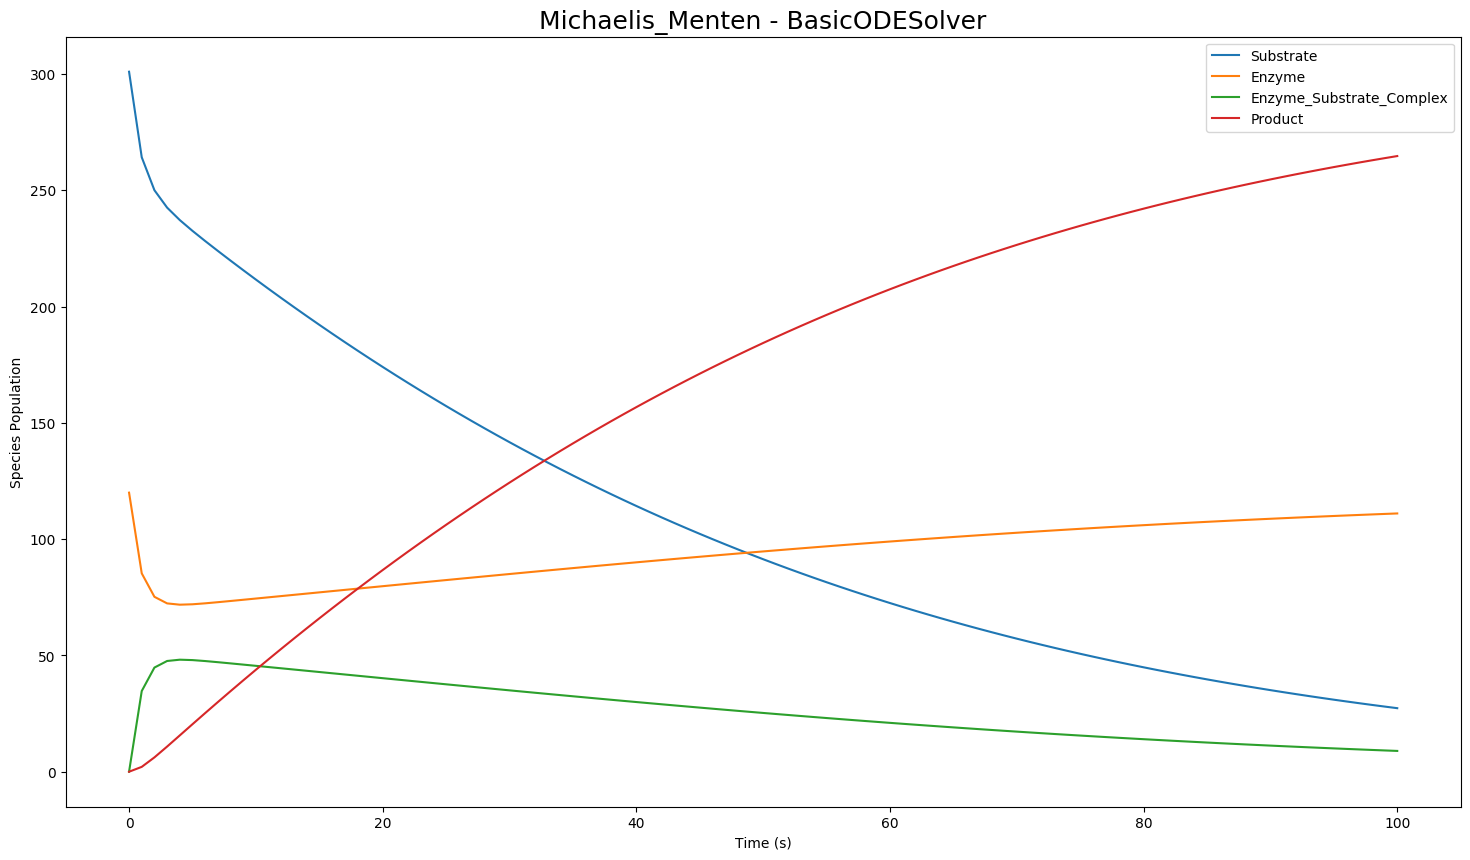

In [72]:
average_results = results.average_ensemble()

average_results.plot()

In [74]:
results.plotplotly(multiple_graphs= True)

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="3c69628d-2948-4ae3-8d44-0db32beed742" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("3c69628d-2948-4ae3-8d44-0db32beed742")) {
                    Plotly.newPlot(
                        '3c69628d-2948-4ae3-8d44-0db32beed742',
                        [{"mode": "lines", "name": "Substrate 0", "type": "scatter", "uid": "5eed8566-76a0-45fb-b0a2-eca3fbd5406d", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [301.0, 264.2078602973639, 250.0483271597408, 242.56742461001136, 237.21109516961488, 232.57191006173554, 228.20167406245926, 223.95559128840563, 219.78644570623482, 215.6787344005599, 211.6272495466238, 207.63024737676608, 203.68709307176627, 199.79748565095792, 195.96126572212162, 192.1782942369487, 188.44843117784265, 184.77152726112368, 181.1474202580027, 177.57593366651093, 174.05687653175164, 170.59004354199095, 167.1752151043096, 163.81215736298918, 160.50062279352338, 157.24034987209757, 154.03106314735373, 150.872473821137, 147.76427974390722, 144.7061658290939, 141.69780435253847, 138.73885505816475, 135.82896561623096, 132.96777189950038, 130.15489821207396, 127.38995775968462, 124.67255298492839, 122.00227583732904, 119.37870826141842, 116.80142274285585, 114.26998240369159, 111.78394089440916, 109.34284363205087, 106.94622847825299, 104.5936261293158, 102.2845593511098, 100.01854300854403, 97.79508796922094, 95.61369793248028, 93.47387012747602, 91.37509866946503, 89.31687254131332, 87.2986765182716, 85.31999156568442, 83.38029480006813, 81.47906137319379, 79.6157638160744, 77.78987214599422, 76.00085542324038, 74.24818038642108, 72.53131213637447, 70.84971851001144, 69.20286641974585, 67.59021963237674, 66.01124359781411, 64.46541133150772, 62.952183892472156, 61.47103980402467, 60.0214436884511, 58.60287716794744, 57.21480930007603, 55.85672899065925, 54.52810792491285, 53.22844260314498, 51.957214795195895, 50.713918244365466, 49.49805558244798, 48.309123192277, 47.14662355521753, 46.01007198104737, 44.898986003049, 43.812876724625035, 42.75127084329066, 41.71369919245142, 40.699698662987906, 39.708811334333454, 38.74057821526267, 37.79455769790504, 36.870305345646344, 35.967392702619684, 35.08536463853207, 34.22381077197472, 33.38229892028298, 32.5604174369068, 31.75778530321096, 30.973974462367945, 30.208586883276222, 29.461232652192436, 28.731556062963442, 28.019155468607888, 27.323649735060055]}, {"mode": "lines", "name": "Enzyme 0", "type": "scatter", "uid": "ca481c28-6ad6-4494-b5d0-54f94ca1259c", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [120.0, 85.297

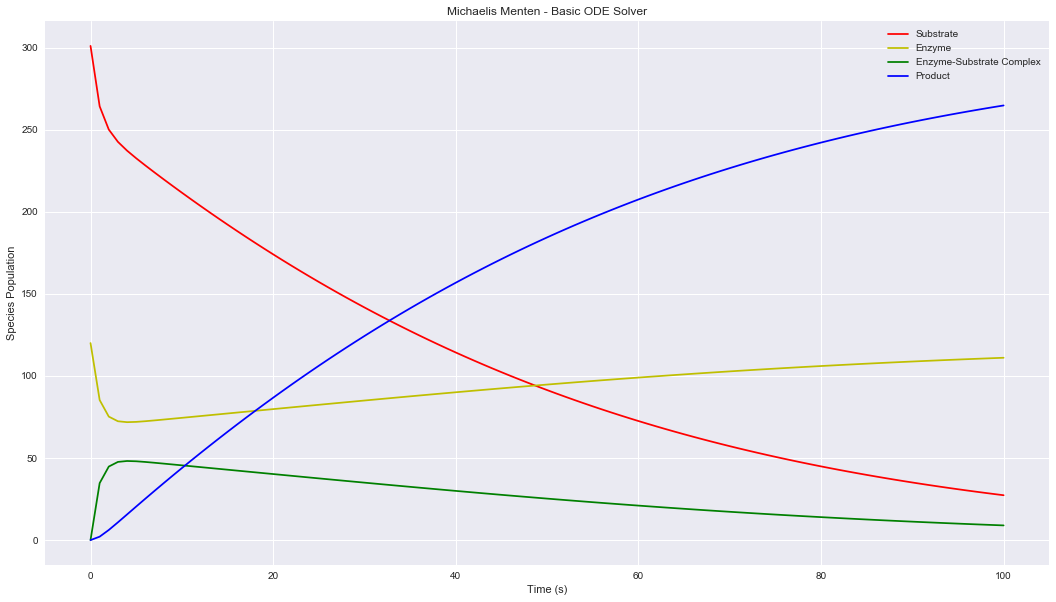

In [8]:
plt.figure(figsize=(18,10))
plt.title("Michaelis Menten - Basic ODE Solver")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")
plt.plot(results['time'],results['Substrate'],'r', label='Substrate')
plt.plot(results['time'],results['Enzyme'],'y', label='Enzyme')
plt.plot(results['time'],results['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['Product'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')

In [9]:
%time dresults = model.run(solver=BasicODESolver, show_labels=False)

CPU times: user 50.8 ms, sys: 1.41 ms, total: 52.2 ms
Wall time: 52.9 ms


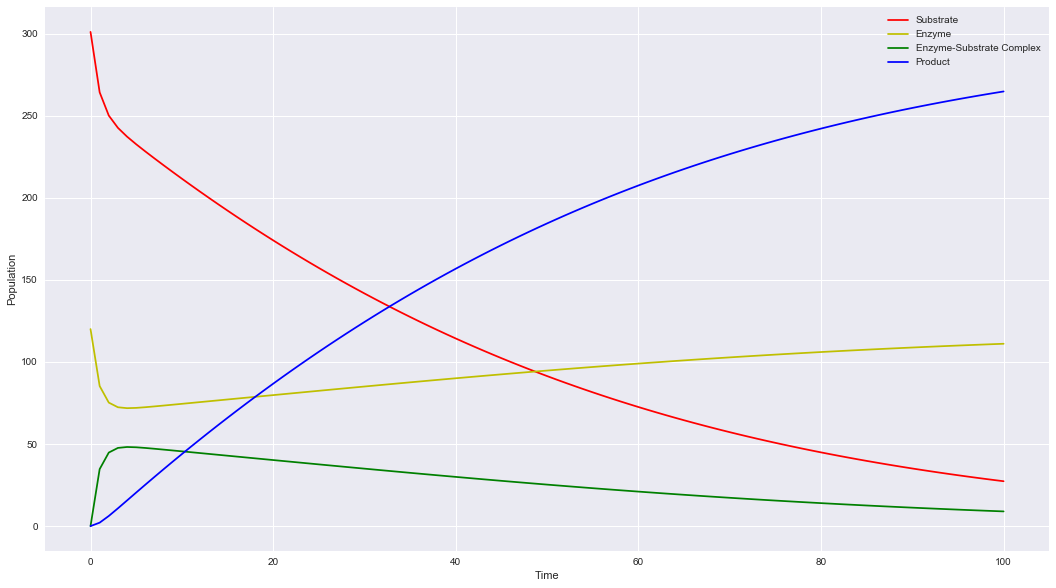

In [10]:
plt.figure(figsize=(18,10))
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(dresults[0][:,0],dresults[0][:,1],'r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,2],'y', label='Enzyme')
plt.plot(dresults[0][:,0],dresults[0][:,3],'g', label='Enzyme-Substrate Complex')
plt.plot(dresults[0][:,0],dresults[0][:,4],'b', label='Product')


plt.plot([0],[11])
plt.legend(loc='best')